# Importing the necessary libraries

In [41]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os

from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications.mobilenet import MobileNet

import tensorflow.keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras import optimizers
from keras.layers import Resizing
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D,BatchNormalization,LayerNormalization

In [42]:
# Loading the Dataset and getting size of it
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("Size of the train images", x_train.shape)
print("Size of the test images", x_test.shape)

Size of the train images (50000, 32, 32, 3)
Size of the test images (10000, 32, 32, 3)


In [43]:
x_test, y_test = x_test[:5000], y_test[:5000]
x_val, y_val = x_train[:5000], y_train[:5000]
x_train, y_train = x_train[30000:], y_train[30000:]

In [44]:
print("Training data size: ", x_train.shape)
print("Validation data size: ", x_val.shape)
print("Test data size: ", x_test.shape)
print("Training data Labels", y_train.shape)
print("Validation data Labels", y_val.shape)

Training data size:  (20000, 32, 32, 3)
Validation data size:  (5000, 32, 32, 3)
Test data size:  (5000, 32, 32, 3)
Training data Labels (20000, 1)
Validation data Labels (5000, 1)


# Data preprocessing


In [45]:
from keras.utils import np_utils

num_classes = 10

# Convert class vectors to binary class matrices.
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_val = np_utils.to_categorical(y_val, num_classes)

In [46]:
from sklearn.utils import shuffle

x_val, y_val  = shuffle(x_val, y_val)
x_train, y_train = shuffle(x_train, y_train)

# MobileNet model


In [47]:
# Base model for the mobilenet model
mobnet_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

In [48]:
image_size = (224,224)

from keras import layers
from keras import models

num_classes = 10

model1 = Sequential()
keras.layers.experimental.preprocessing.Resizing(image_size[0], image_size[1], interpolation="bilinear", input_shape=x_train.shape[1:]),
           
model1.add(mobnet_model) 

#hidden layers
model1.add(GlobalAveragePooling2D())
model1.add(Dense(1024,activation=('relu')))
model1.add(Dense(512,activation=('relu')))  
model1.add(Dense(512,activation=('relu'))) 
model1.add(Dense(512,activation=('relu'))) 
model1.add(Dense(256,activation=('relu'))) 
model1.add(Dropout(0.3))
model1.add(Dense(10,activation=('softmax')))


model1.compile(loss='categorical_crossentropy',
              optimizer= 'Adam',
              metrics=['acc'])

# Creating the model and compiling it
model1.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

# a summary of the model
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, None, None, 1024)  3228864  
 nal)                                                            
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 512)              

In [49]:
history = model1.fit(x_train, y_train, batch_size = 64, epochs = 15, validation_data = (x_test, y_test))

Epoch 1/15
313/313 [==============================] - 27s 30ms/step - loss: 1.3528 - accuracy: 0.5447 - val_loss: 1.1364 - val_accuracy: 0.6150
Epoch 2/15
313/313 [==============================] - 9s 28ms/step - loss: 0.9753 - accuracy: 0.7006 - val_loss: 1.0155 - val_accuracy: 0.6832
Epoch 3/15
313/313 [==============================] - 9s 28ms/step - loss: 0.8393 - accuracy: 0.7419 - val_loss: 0.8446 - val_accuracy: 0.7356
Epoch 4/15
313/313 [==============================] - 9s 28ms/step - loss: 0.7450 - accuracy: 0.7692 - val_loss: 0.8865 - val_accuracy: 0.7354
Epoch 5/15
313/313 [==============================] - 9s 28ms/step - loss: 0.6651 - accuracy: 0.7954 - val_loss: 1.0105 - val_accuracy: 0.7118
Epoch 6/15
313/313 [==============================] - 9s 30ms/step - loss: 0.6173 - accuracy: 0.8133 - val_loss: 0.9938 - val_accuracy: 0.7212
Epoch 7/15
313/313 [==============================] - 9s 29ms/step - loss: 0.5767 - accuracy: 0.8299 - val_loss: 0.8936 - val_accuracy: 0.746

In [50]:
evaluation = model1.evaluate(x_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

157/157 [==============================] - 1s 7ms/step - loss: 0.9928 - accuracy: 0.7560
Test Accuracy: 0.7559999823570251


In [51]:
original_w = model1.get_weights()

In [52]:
model1.set_weights(original_w)
evaluation = model1.evaluate(x_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

157/157 [==============================] - 1s 7ms/step - loss: 0.9928 - accuracy: 0.7560
Test Accuracy: 0.7559999823570251


In [53]:
num_layers = 6

# Changing of weights

In [54]:
accuracys=[]

In [55]:
print(accuracys)

[]


In [56]:
import random
import numpy as np
import struct
x=num_layers - 1
new_acc = []
indexes = []
weights = original_w
for i in range(len(original_w)-2,len(original_w)-1-(2*x),-2):
   indexes.append(i)
l1=indexes[::-1]

for i in range(len(l1)):  
  for j in range(50):
      k=random.randint(0,len(weights[l1[i]])-1)
      idx=random.randint(0,len(weights[l1[i]][k])-1)
      r_weight = weights[l1[i]][k][idx]
      # print(r_weight)
      r_weight = format(struct.unpack('!I', struct.pack('!f', r_weight))[0], '032b')
      r_bit_index = random.randint(0,31)
      r_bit = r_weight[r_bit_index]
      
      if(r_bit == '0'):
        r_weight = r_weight[:r_bit_index] + '1' + r_weight[r_bit_index + 1:]
      if(r_bit == '1'):
        r_weight = r_weight[:r_bit_index] + '0' + r_weight[r_bit_index + 1:]
      r_weight = struct.unpack('!f',struct.pack('!I', int(r_weight, 2)))[0]
      # print(r_weight)
      weights[l1[i]][k][idx]=r_weight
  model1.set_weights(weights)
  print("layer ", i+1)
  print("no of weights changed: ",j+1)
  acc = model1.evaluate(x_test, y_test)
  print("test accuracy {}".format(acc[1]))
  new_acc.append(acc[1]*100)
  weights=original_w
  model1.set_weights(original_w)
  print("\n")
accuracys.append(new_acc)

layer  1
no of weights changed:  50
157/157 [==============================] - 1s 9ms/step - loss: 0.9928 - accuracy: 0.7560
test accuracy 0.7559999823570251


layer  2
no of weights changed:  50
157/157 [==============================] - 1s 7ms/step - loss: inf - accuracy: 0.6112
test accuracy 0.6111999750137329


layer  3
no of weights changed:  50
157/157 [==============================] - 1s 6ms/step - loss: inf - accuracy: 0.6112
test accuracy 0.6111999750137329


layer  4
no of weights changed:  50
157/157 [==============================] - 1s 6ms/step - loss: inf - accuracy: 0.6112
test accuracy 0.6111999750137329


layer  5
no of weights changed:  50
157/157 [==============================] - 1s 6ms/step - loss: inf - accuracy: 0.6122
test accuracy 0.6122000217437744




In [ ]:
acc_graph=[]
for j in range(len(accuracys[0])):
  a=[]
  for i in range(len(accuracys)):
    a.append(accuracys[i][j])
  acc_graph.append(a)

In [58]:
import matplotlib.pyplot as plt

In [ ]:
numberofweightchange=[50,75,100,125,150]
for i in range(len(acc_graph)):
  plt.plot(numberofweightchange, acc_graph[i], label=f'layer {len(acc_graph)-i-1}')
plt.xlabel('Number of weights changed')
plt.ylabel('Accuracy')
plt.title('Effect on accuracy when weights are changed by bit-flip')
plt.legend()
plt.show()

In [ ]:
average=[]
for i in acc_graph:
  average.append(sum(i)/len(i))
print(average)

In [60]:
#changing the weights by multiplying with scalars

accuracys=[]
x=num_layers-1
for i in range(len(original_w)-2,len(original_w)-1-(2*x),-2):
  accuracy=[]
  print("Layer :",x)
  for scalar in [.25, 0.4, 0.6, 0.85, 0.96,1, 1.1,1.25,1.5,1.75,2.]:
    new_w=[]
    for w in range(len(original_w)):
      if(w==i):
        new_w.append(original_w[w]*scalar)
      else:
        new_w.append(original_w[w])
    model1.set_weights(new_w)
    evaluation = model1.evaluate(x_test, y_test)
    print("Scalar {} --> test accuracy {}".format(scalar,evaluation[1]))
    accuracy.append(evaluation[1])
    model1.set_weights(original_w)
  x-=1
  model1.set_weights(original_w)
  accuracys.append(accuracy)

Layer : 5
157/157 [==============================] - 1s 7ms/step - loss: inf - accuracy: 0.6100
Scalar 0.25 --> test accuracy 0.6100000143051147
157/157 [==============================] - 1s 7ms/step - loss: inf - accuracy: 0.6108
Scalar 0.4 --> test accuracy 0.61080002784729
157/157 [==============================] - 1s 7ms/step - loss: inf - accuracy: 0.6112
Scalar 0.6 --> test accuracy 0.6111999750137329
157/157 [==============================] - 1s 7ms/step - loss: inf - accuracy: 0.6122
Scalar 0.85 --> test accuracy 0.6122000217437744
157/157 [==============================] - 1s 9ms/step - loss: inf - accuracy: 0.6122
Scalar 0.96 --> test accuracy 0.6122000217437744
157/157 [==============================] - 1s 7ms/step - loss: inf - accuracy: 0.6122
Scalar 1 --> test accuracy 0.6122000217437744
157/157 [==============================] - 1s 7ms/step - loss: inf - accuracy: 0.6124
Scalar 1.1 --> test accuracy 0.6123999953269958
157/157 [==============================] - 2s 11ms/st

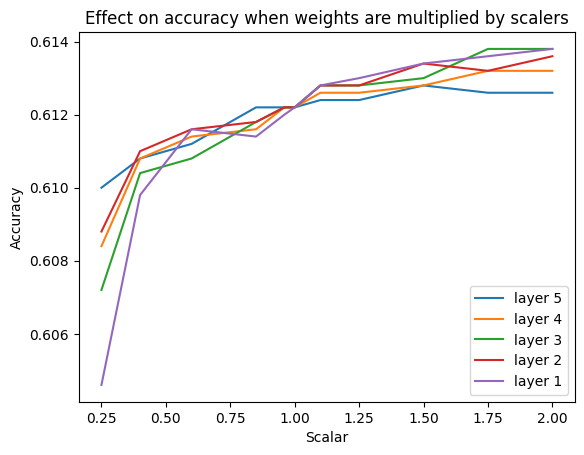

In [61]:
#plotting the accuracies after weight changes

scalars=[.25, 0.4, 0.6, 0.85, 0.96, 1, 1.1,1.25,1.5,1.75,2.]
for i in range(len(accuracys)):
  plt.plot(scalars, accuracys[i], label=f'layer {num_layers-i-1}')
plt.xlabel('Scalar')
plt.ylabel('Accuracy')
plt.title('Effect on accuracy when weights are multiplied by scalers')
plt.legend()
plt.show()

In [62]:
average=[]
for i in accuracys:
  average.append(sum(i)/len(i))
print(average)

[0.611945466561751, 0.6119091023098339, 0.6118909174745734, 0.612127276984128, 0.6116545417092063]


In [63]:
#changing weights by adding scalars

accuracys=[]
x=num_layers-1
for i in range(len(original_w)-2,len(original_w)-1-(2*x),-2):
  accuracy=[]
  print("Layer :",x)
  for scalar in [.25, 0.4, 0.6, 0.85, 0.96,1, 1.1,1.25,1.5,1.75,2.]:
    new_w=[]
    for w in range(len(original_w)):
      if(w==i):
        new_w.append(original_w[w]+scalar)
      else:
        new_w.append(original_w[w])
    model1.set_weights(new_w)
    evaluation = model1.evaluate(x_test, y_test)
    print("Scalar {} --> test accuracy {}".format(scalar,evaluation[1]))
    accuracy.append(evaluation[1])
    model1.set_weights(original_w)
  x-=1
  model1.set_weights(original_w)
  accuracys.append(accuracy)

Layer : 5
157/157 [==============================] - 1s 7ms/step - loss: inf - accuracy: 0.6122
Scalar 0.25 --> test accuracy 0.6122000217437744
157/157 [==============================] - 1s 6ms/step - loss: inf - accuracy: 0.6122
Scalar 0.4 --> test accuracy 0.6122000217437744
157/157 [==============================] - 1s 7ms/step - loss: inf - accuracy: 0.6122
Scalar 0.6 --> test accuracy 0.6122000217437744
157/157 [==============================] - 1s 7ms/step - loss: inf - accuracy: 0.6122
Scalar 0.85 --> test accuracy 0.6122000217437744
157/157 [==============================] - 1s 7ms/step - loss: inf - accuracy: 0.6122
Scalar 0.96 --> test accuracy 0.6122000217437744
157/157 [==============================] - 1s 7ms/step - loss: inf - accuracy: 0.6122
Scalar 1 --> test accuracy 0.6122000217437744
157/157 [==============================] - 1s 8ms/step - loss: inf - accuracy: 0.6122
Scalar 1.1 --> test accuracy 0.6122000217437744
157/157 [==============================] - 1s 7ms/s

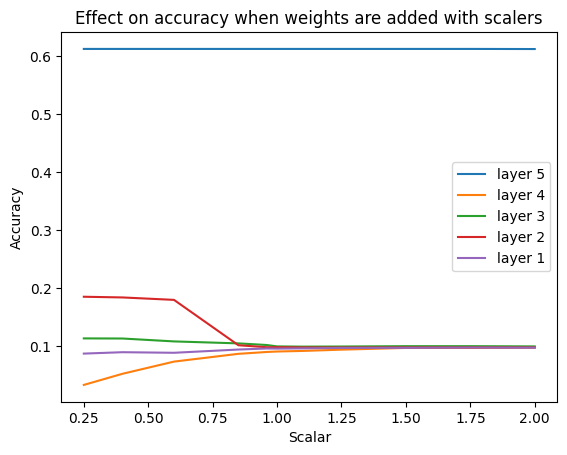

In [64]:
#plotting the accuracies after weight changes

scalars=[.25, 0.4, 0.6, 0.85, 0.96, 1, 1.1,1.25,1.5,1.75,2.]
for i in range(len(accuracys)):
    plt.plot(scalars, accuracys[i], label=f'layer {num_layers-i-1}')
plt.xlabel('Scalar')
plt.ylabel('Accuracy')
plt.title('Effect on accuracy when weights are added with scalers')
plt.legend()
plt.show()

In [65]:
average=[]
for i in accuracys:
  average.append(sum(i)/len(i))
print(average)

[0.6121818369085138, 0.08201818202029575, 0.10338181799108331, 0.12123636291785674, 0.0940545451912013]
